In [8]:
from utils import *

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

In [9]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}
rc('font', **font)

In [10]:
def barplot(experiments, experiment_names, category, bar_width, figsize, legend=True):
    if category == 'GLOPs':
        category_label = 'GFLOPs'
    elif category == 'Cycles':
        category_label = 'Time (ms)'
    elif category == 'Energy':
        category_label = 'Energy (uJ)'
    else:
        category_label = category
        

    hatches = ["*", "x", "+", "/", ".", "-", "|"]

    assert len(experiments) == len(experiment_names)
    assert len(experiments) <= len(hatches)

    layer_names = ['Layer {}'.format(i + 1) for i in range(len(experiments[0]))]

    values = []
    for _ in range(len(experiments)):
        values.append([])

    # values is `experiments` long
    for e, exp in enumerate(experiments):
        for layer_stats in exp:
            if category == 'Cycles':
                if "Albireo" in experiment_names[e]:
                    values[e].append(1e3 * 1e-9 * (layer_stats[category])/5 )
                else:
                    values[e].append(1e3 * 1e-9 * (layer_stats[category]) )
            else:
                values[e].append(layer_stats[category])
                

    rs = [np.arange(len(layer_names))]
    for i in range(1, len(experiments)):
        rs.append([x + bar_width for x in rs[i-1]])
            
    plt.figure(figsize=figsize)

    for e in range(len(experiments)):
        bars = plt.bar(rs[e], values[e], color='silver', width=bar_width, edgecolor='black', linewidth=1.5, label=experiment_names[e])
        for bar in bars.patches:
            bar.set_hatch(hatches[e])

    plt.xticks([r + bar_width for r in range(len(layer_names))], layer_names)
    plt.ylabel(category_label)

    if legend:
        plt.legend()

## Plot 1

In [ ]:
alexnet_manual_9_keep = load_data('../results/alexnet/manual/9_keep/stats.pkl')
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep/stats.pkl')
alexnet_mapper_eyeriss = load_data('../results/alexnet_eyeriss/mapper/stats.pkl')
alexnet_mapper_pim = load_data('../results/alexnet_pim/mapper/stats.pkl')

experiments = [
    alexnet_manual_9_keep,
    alexnet_mapper_9_keep,
    alexnet_mapper_eyeriss,
    alexnet_mapper_pim,
]

experiment_names = [
    'Albireo: AlexNet (Original)',
    'Albireo: AlexNet (Timeloop)',
    'Eyeriss: AlexNet',
    'PIM: AlexNet',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(7, 4), legend=True)
    plt.savefig('../figures/plot1/{}.pdf'.format(i))

## Plot 2

In [ ]:
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep/stats.pkl')
alexnet_mapper_9_bypass = load_data('../results/alexnet/mapper/9_bypass/stats.pkl')

experiments = [
    alexnet_mapper_9_keep,
    alexnet_mapper_9_bypass,
]

experiment_names = [
    'Albireo: Original Constraints',
    'Albireo: New Constraints',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(7, 4), legend=True)
    plt.savefig('../figures/plot2/{}.pdf'.format(i))

## Plot 3

In [ ]:
alexnet_mapper_3_keep = load_data('../results/alexnet/mapper/3_keep/stats.pkl')
alexnet_mapper_6_keep = load_data('../results/alexnet/mapper/6_keep/stats.pkl')
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep/stats.pkl')
alexnet_mapper_27_keep = load_data('../results/alexnet/mapper/27_keep/stats.pkl')

experiments = [
    alexnet_mapper_3_keep,
    alexnet_mapper_6_keep,
    alexnet_mapper_9_keep,
    alexnet_mapper_27_keep,
]

experiment_names = [
    'Albireo: AlexNet (Timeloop, 3 PLCGs)',
    'Albireo: AlexNet (Timeloop, 6 PLCGs)',
    'Albireo: AlexNet (Timeloop, 9 PLCGs)',
    'Albireo: AlexNet (Timeloop, 27 PLCGs)',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(10, 4), legend=True)
    plt.savefig('../figures/plot3/{}.pdf'.format(i))

## Plot 4

In [ ]:
vgg16_mapper_9_keep = load_data('../results/vgg16/mapper/9_keep/stats.pkl')
vgg16_mapper_eyeriss = load_data('../results/vgg16_eyeriss/mapper/stats.pkl')

experiments = [
    vgg16_mapper_9_keep,
    vgg16_mapper_eyeriss,
]

experiment_names = [
    'Albireo: VGG16 (Timeloop)',
    'Eyeriss: VGG16',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(15, 4), legend=True)
    plt.savefig('../figures/plot4/{}.pdf'.format(i))

## Plot 5

In [ ]:
mem_8 = load_data('../results/alexnet/manual/mem_8/stats.pkl')
mem_16 = load_data('../results/alexnet/manual/mem_16/stats.pkl')
mem_32 = load_data('../results/alexnet/manual/mem_32/stats.pkl')
mem_64 = load_data('../results/alexnet/manual/mem_64/stats.pkl')
mem_128 = load_data('../results/alexnet/manual/mem_128/stats.pkl')

experiments = [
    mem_8,
    mem_16,
    mem_32,
    mem_64,
    mem_128,
]

experiment_names = [
    '8 words/cycle',
    '16 words/cycle',
    '32 words/cycle',
    '64 words/cycle',
    '128 words/cycle',
]

categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.1, figsize=(10, 4), legend=True)
    plt.savefig('../figures/memory/{}.pdf'.format(i))

## Extra plot bc of Gohar

In [31]:
def edp(experiments, figsize):
    hatches = ["*", "x", "+", ".", "/", "-", "|"]
    
    # mm^2
    areas = [
        39.05,
        78.07, 
        124.66,
        351.20,
    ]
        
    experiment_names = [
        '3 PLCGs',
        '6 PLCGs',
        '9 PLCGs',
        '27 PLCGs',
    ]
        
    total_time = [[], [], [], []]
    total_energy = [[], [], [], []]

    for e, exp in enumerate(experiments):
        for layer_stats in exp:
            total_time[e].append( 1e3 * 1e-9 * (layer_stats['Cycles'])/5 )
            total_energy[e].append( 1e-6 * layer_stats['Energy'] )
            
    times = []
    energies = []
    
    for (t, e) in zip(total_time, total_energy):
        times.append(sum(t)/len(t))
        energies.append(sum(e)/len(e))
    
    bar_width = 0.2
    rs = [0.2, 1.2, 2.2, 3.2]
            
    
    fig, ax1 = plt.subplots(figsize=figsize)

    for e in range(len(experiments)):
        bars = ax1.bar(
            rs[e], times[e] * energies[e], color='silver', 
            width=bar_width, edgecolor='black', linewidth=1.5,
        )
        

    ax1.set_xticks([r + bar_width for r in range(4)], experiment_names)
    ax1.set_ylabel("EDP ($J * ms$)")
    
    ax2 = ax1.twinx()
    ax2.plot(rs, areas, linewidth=3.0, color='black')
    ax2.set_ylabel("Area ($mm^2$)")
    
    fig.tight_layout()
    plt.show()
    
    fig.savefig('../figures/plot6/edp.pdf')    

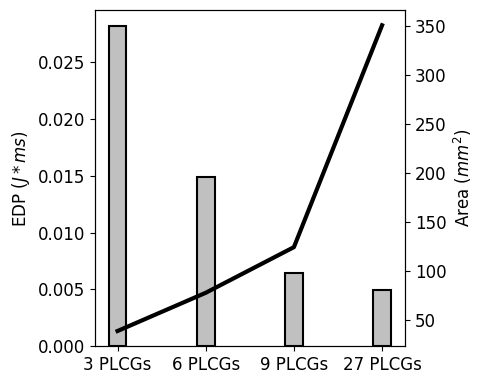

In [32]:
vgg16_mapper_3_keep = load_data('../results/vgg16/mapper/3_keep/stats.pkl')
vgg16_mapper_6_keep = load_data('../results/vgg16/mapper/6_keep/stats.pkl')
vgg16_mapper_9_keep = load_data('../results/vgg16/mapper/9_keep/stats.pkl')
vgg16_mapper_27_keep = load_data('../results/vgg16/mapper/27_keep/stats.pkl')

edp(
    [vgg16_mapper_3_keep, vgg16_mapper_6_keep, vgg16_mapper_9_keep, vgg16_mapper_27_keep],
    (5, 4)
)

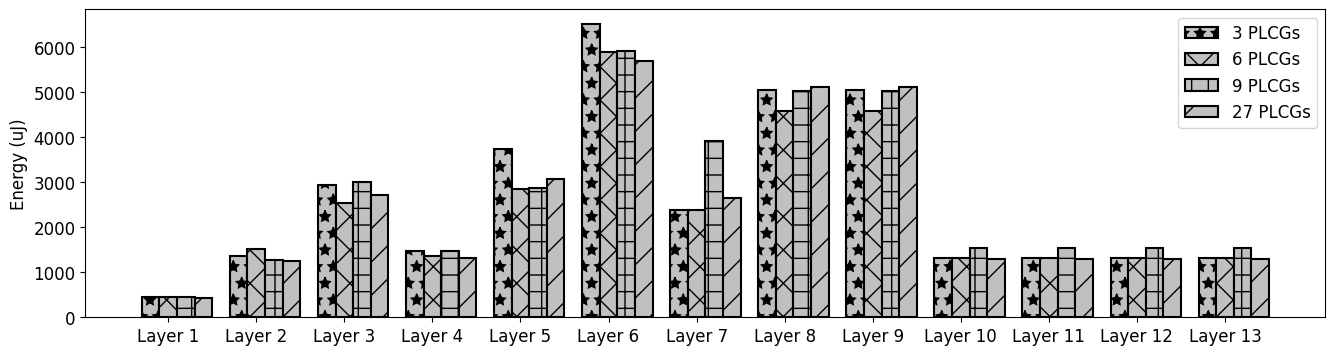

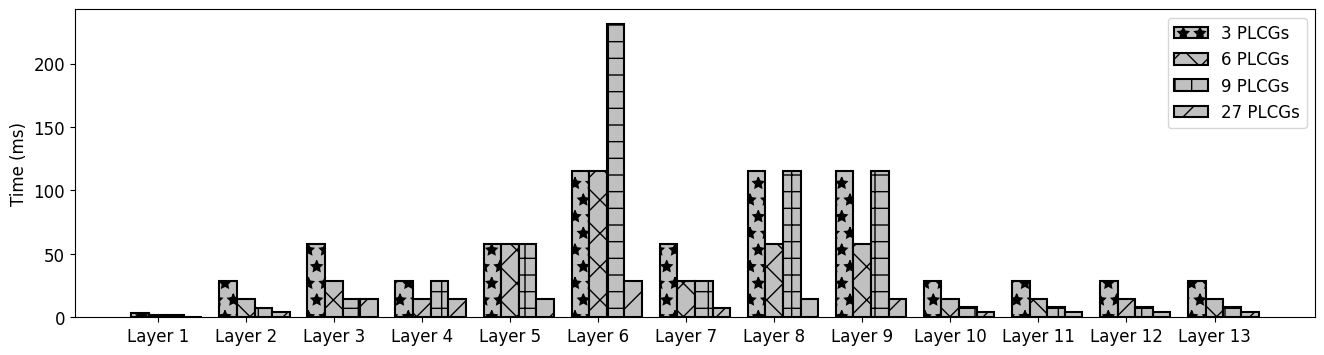

In [15]:
experiments = [
    vgg16_mapper_3_keep, 
    vgg16_mapper_6_keep, 
    vgg16_mapper_9_keep, 
    vgg16_mapper_27_keep
]

experiment_names = [
        '3 PLCGs',
        '6 PLCGs',
        '9 PLCGs',
        '27 PLCGs',
]

categories = ['Energy', 'Cycles']

for i, category in enumerate(categories):
    barplot(experiments, experiment_names, category, bar_width=0.2, figsize=(16, 4), legend=True)
    plt.savefig('../figures/plot6/{}.pdf'.format(i))

In [16]:
total_time = [[], [], [], []]
total_energy = [[], [], [], []]

for e, exp in enumerate(experiments):
    for layer_stats in exp:
        total_time[e].append( 1e3 * 1e-9 * (layer_stats['Cycles'])/5 )
        total_energy[e].append( 1e-6 * layer_stats['Energy'] )

times = []
energies = []

for (t, e) in zip(total_time, total_energy):
    times.append(sum(t)/len(t))
    energies.append(sum(e)/len(e))

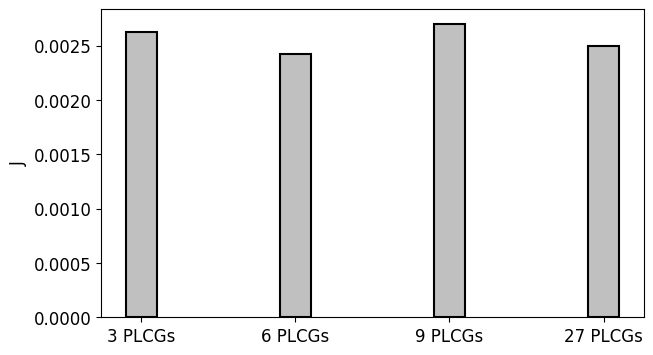

In [23]:
bar_width = 0.2
rs = [0.2, 1.2, 2.2, 3.2]


fig, ax1 = plt.subplots(figsize=(7, 4))

for e in range(len(experiments)):
    bars = ax1.bar(
        rs[e], energies[e], color='silver', 
        width=bar_width, edgecolor='black', linewidth=1.5,
    )

ax1.set_xticks([r + bar_width for r in range(4)], experiment_names)
ax1.set_ylabel("J")

fig.savefig('../figures/plot6/average_energy.pdf')

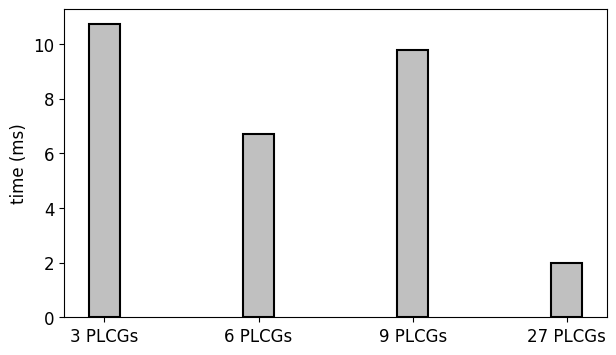

In [24]:
bar_width = 0.2
rs = [0.2, 1.2, 2.2, 3.2]


fig, ax1 = plt.subplots(figsize=(7, 4))

for e in range(len(experiments)):
    bars = ax1.bar(
        rs[e], times[e], color='silver', 
        width=bar_width, edgecolor='black', linewidth=1.5,
    )

ax1.set_xticks([r + bar_width for r in range(4)], experiment_names)
ax1.set_ylabel("time (ms)")

fig.savefig('../figures/plot6/average_time.pdf')